# Physique : TD TraitementSignal

- author : Sylvie Dagoret-Campagne
- afflilation : LAL/IJCLab, CNRS
- creation date : September 6th 2020
- update : 
 

In [158]:
import os
import re
import numpy as np

In [159]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8') # vary depending on your lang/locale

'en_US.UTF-8'

In [160]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx

In [161]:
import numpy as np
import re
import time
from datetime import datetime,date
import dateutil.parser

In [162]:
from scipy import signal

In [163]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(15,6)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

# Start

In [164]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

# définition

## Constantes

In [165]:
R = 100.0 # Ohm
L = 1e-1 # Henry
M = 1e-2 # Henry
C = 1e-6 #Farat

In [166]:
def H(x):
    """
    H fonction de transfert
    x frequence
    
    """
    Num=1j*M*R*x
    Denom=(R+1j*(L*x-1/(C*x)))**2+(M*x)**2
           
    y = Num/Denom
           
    return y

In [167]:
def Mod(x):
    return np.abs(H(x))

In [168]:
def Arg(x):
    
    realpart = np.real(H(x))
    imagpart = np.imag(H(x))
    
    #angle = np.where(realpart > 0, np.angle(H(x)),  np.angle(H(x)) )
    
    angle = np.angle(H(x))
    
    return angle

# Vecteurs des X

In [169]:
X = np.logspace(-6,6,100,base=10)

In [170]:
G = Mod(X)

In [171]:
Phi= Arg(X)*180./np.pi

# Plot

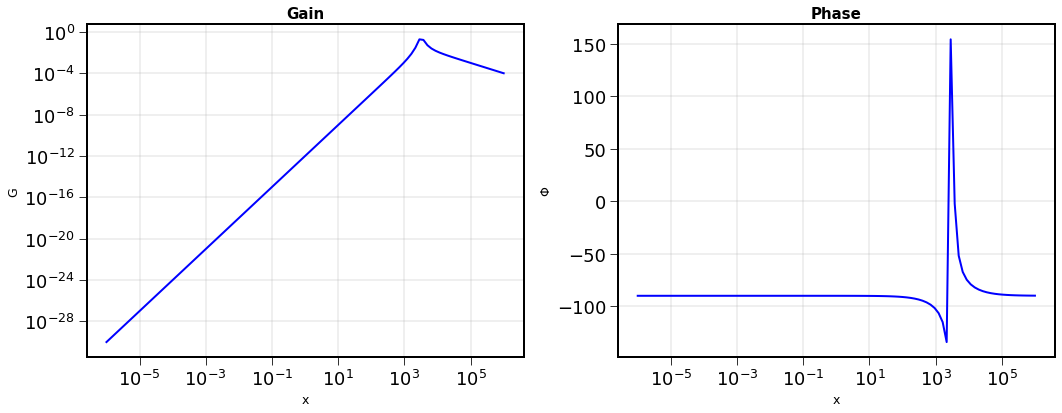

In [172]:
# Gain
fig=plt.figure()
ax=fig.add_subplot(121)
ax.loglog(X,G,"b-")
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("G")
ax.set_title("Gain")
#plt.ylim(1e-6,10)


# Phase
ax=fig.add_subplot(122)
ax.semilogx(X,Phi,"b-")
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("$\\Phi$")
ax.set_title("Phase")

plt.tight_layout()
plt.show()

# Vérification avec signal de la librarie scipy 

In [173]:
# Num = RC2Mp^3
Numerator=[R*C*M, 0,0,0]

In [174]:
# Denom = ((L^2-M^2)C^2 p^4 + 2 RLC^2 p3 + ((RC)^2 +2 LC)p^2 + 2 RCp +1 
Denominator=[ (L**2-M**2)*C**2, 2*R*L*C**2, (R*C)**2+2*L*C, 2*R*C, 1 ]

In [175]:
# on fournit le numérateur et dénominateur de la fonction de transfert (en coefficient de la transformée de Laplace)
s1 = signal.lti(Numerator, Denominator)
w, mag, phase = signal.bode(s1,w=X)

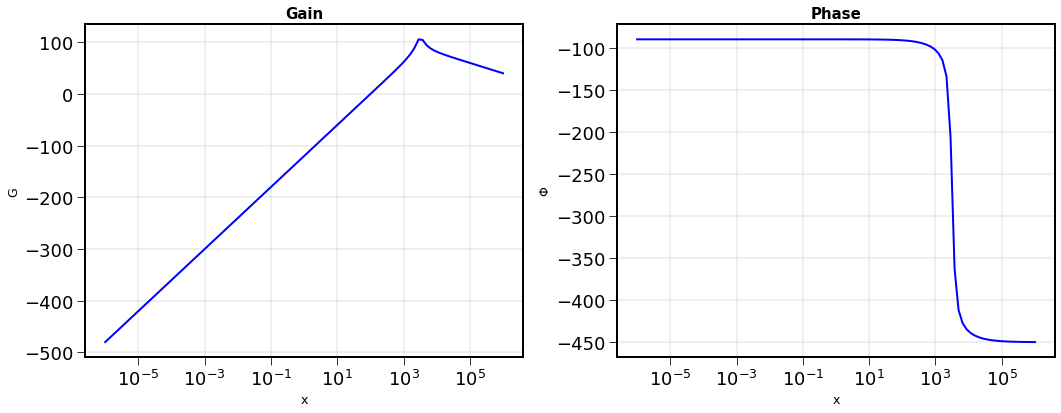

In [176]:
fig=plt.figure()
ax=fig.add_subplot(121)

ax.semilogx(w, mag,"b")    # Bode magnitude plot
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("G")
ax.set_title("Gain")

ax=fig.add_subplot(122)
ax.semilogx(w, phase,"b")  # Bode phase plot
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("$\\Phi$")
ax.set_title("Phase")

plt.tight_layout()
plt.show()